In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data  = pd.read_csv('./data/housing.csv')

## EDA

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
from sklearn.model_selection import train_test_split
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [10]:
train_data = X_train.join(y_train)

In [11]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
5811,-118.26,34.13,37.0,1383.0,470.0,1185.0,451.0,2.5000,<1H OCEAN,207100.0
18444,-121.81,37.25,5.0,1975.0,520.0,861.0,440.0,4.4565,<1H OCEAN,159000.0
5928,-117.80,34.10,13.0,2996.0,495.0,1187.0,464.0,6.2456,INLAND,161700.0
15955,-122.45,37.71,52.0,1658.0,322.0,1086.0,326.0,3.8583,NEAR OCEAN,261600.0
9008,-118.60,34.08,40.0,866.0,181.0,399.0,176.0,6.9100,<1H OCEAN,380000.0
...,...,...,...,...,...,...,...,...,...,...
5757,-118.28,34.18,50.0,2195.0,336.0,878.0,309.0,6.8840,<1H OCEAN,365600.0
8093,-118.21,33.82,45.0,455.0,92.0,394.0,89.0,4.9562,NEAR OCEAN,165700.0
17914,-121.99,37.36,32.0,1754.0,324.0,917.0,330.0,4.6761,<1H OCEAN,298300.0
18103,-122.04,37.30,25.0,2366.0,417.0,1076.0,398.0,6.9238,<1H OCEAN,345900.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

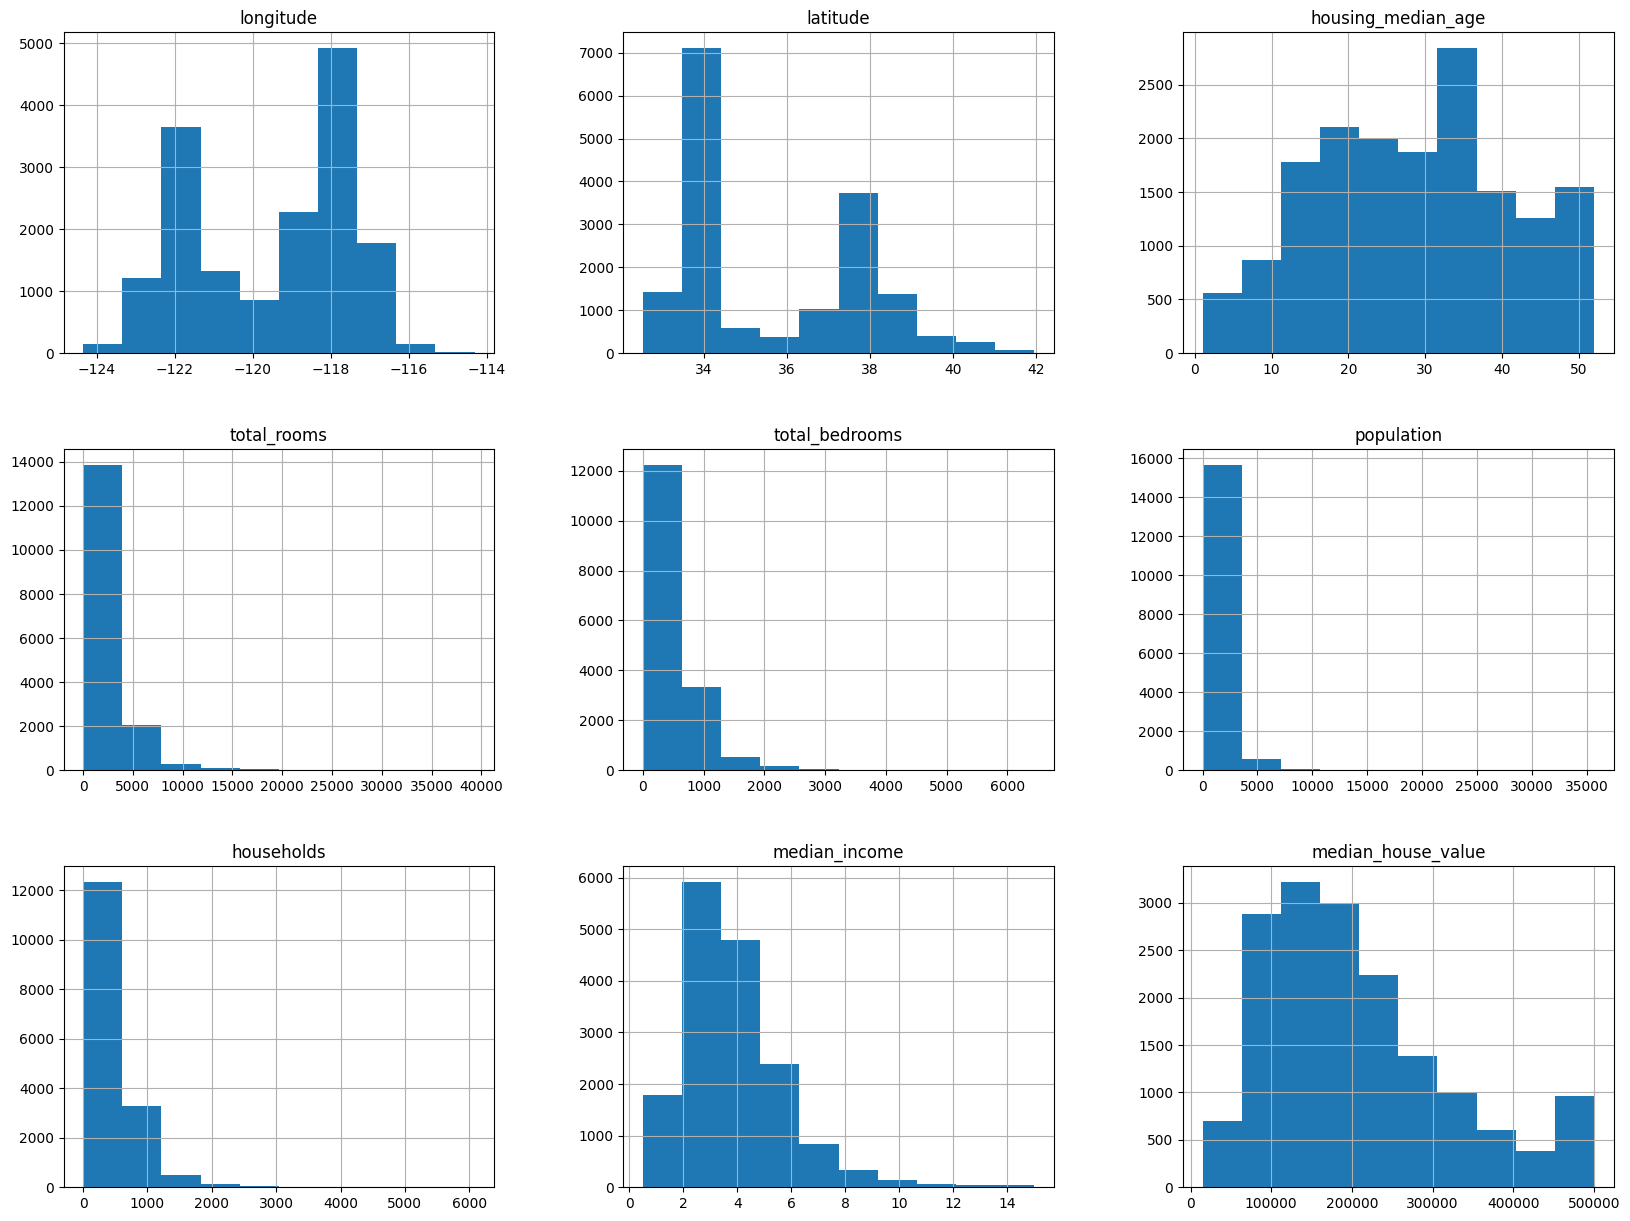

In [20]:
train_data.hist(figsize=(20,15))

In [18]:
train_data.drop('ocean_proximity', axis=1).corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924218,-0.113947,0.043940,0.068379,0.099442,0.055624,-0.016150,-0.049954
latitude,-0.924218,1.000000,0.016321,-0.038315,-0.068717,-0.110509,-0.073716,-0.080123,-0.141051
housing_median_age,-0.113947,0.016321,1.000000,-0.359313,-0.318555,-0.294440,-0.300672,-0.116980,0.105112
total_rooms,0.043940,-0.038315,-0.359313,1.000000,0.930987,0.857326,0.921136,0.201758,0.137300
total_bedrooms,0.068379,-0.068717,-0.318555,0.930987,1.000000,0.876855,0.981188,-0.003423,0.054186
population,0.099442,-0.110509,-0.294440,0.857326,0.876855,1.000000,0.904955,0.008902,-0.022426
households,0.055624,-0.073716,-0.300672,0.921136,0.981188,0.904955,1.000000,0.017589,0.068577
median_income,-0.016150,-0.080123,-0.116980,0.201758,-0.003423,0.008902,0.017589,1.000000,0.689306
median_house_value,-0.049954,-0.141051,0.105112,0.137300,0.054186,-0.022426,0.068577,0.689306,1.000000


<Axes: >

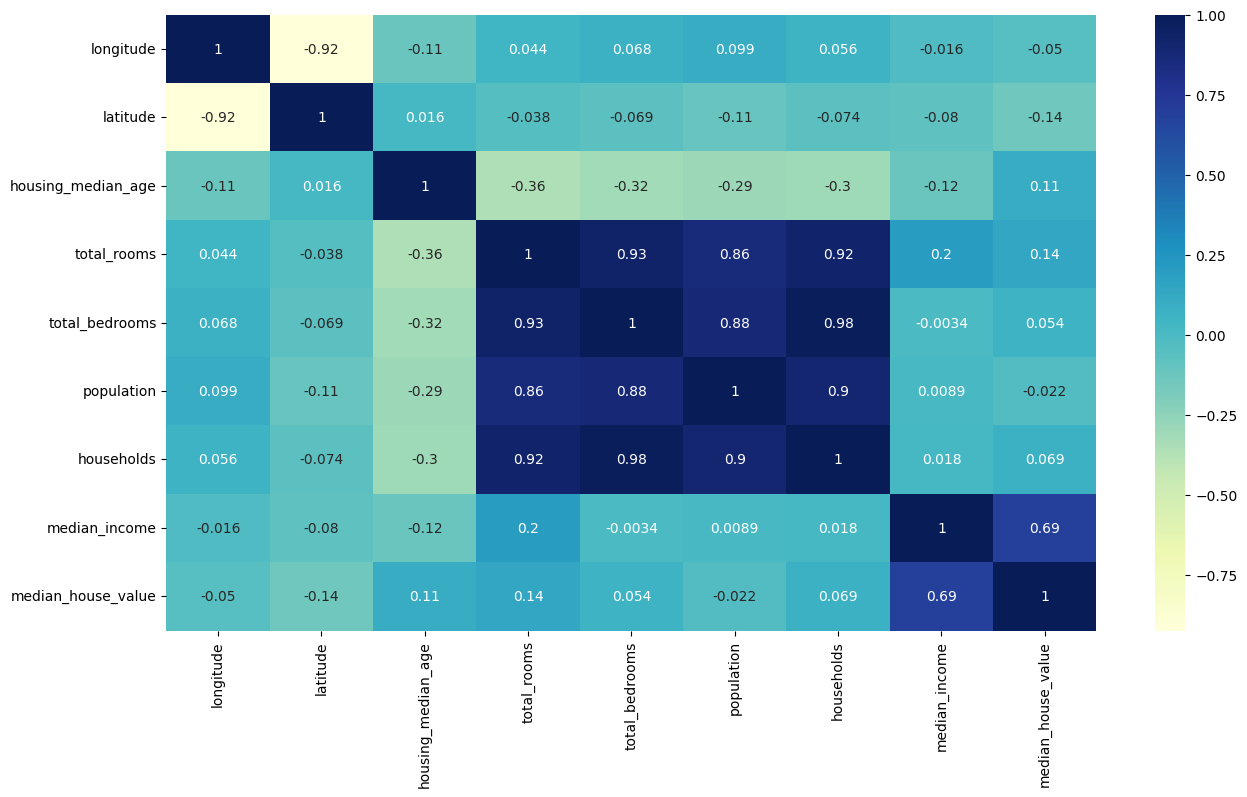

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.drop('ocean_proximity', axis=1).corr(), annot=True, cmap='YlGnBu')

## Preprocessing

In [21]:
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

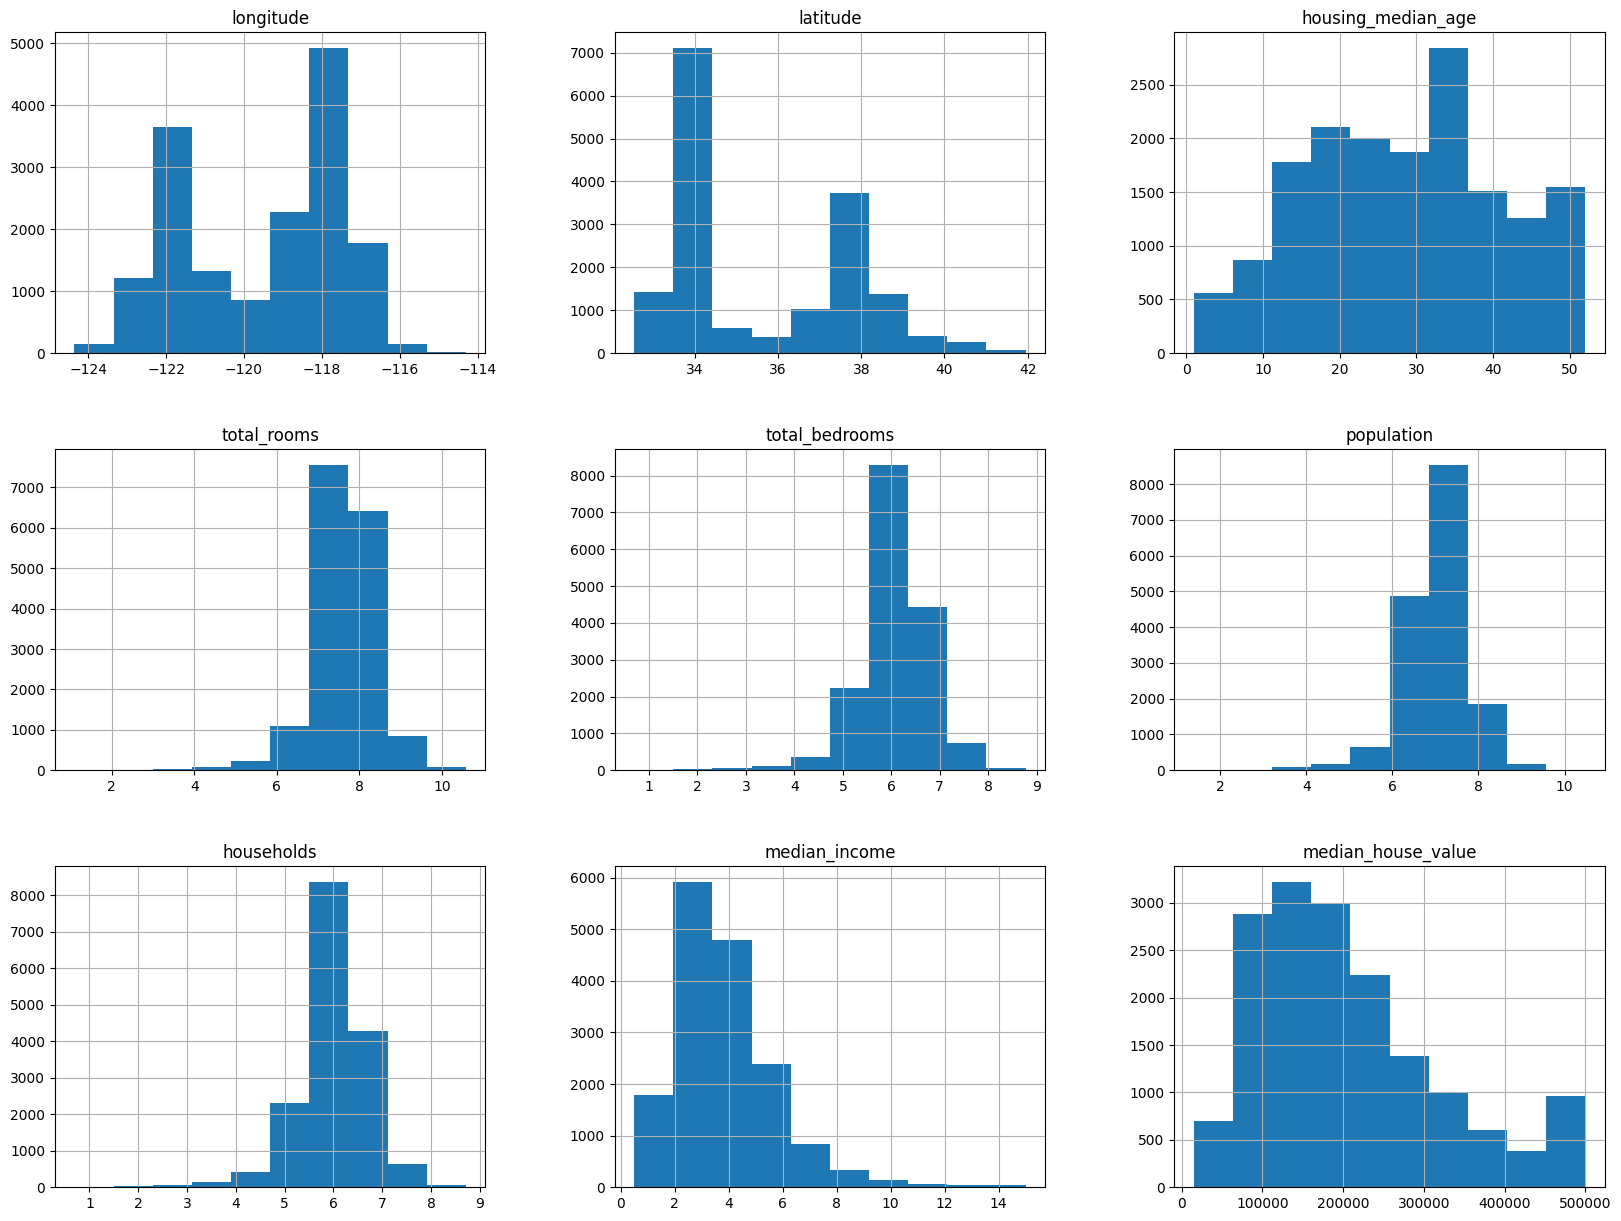

In [22]:
train_data.hist(figsize=(20,15))

In [27]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity']).astype(int)).drop('ocean_proximity', axis=1)

In [28]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5811,-118.26,34.13,37.0,7.232733,6.154858,7.078342,6.113682,2.5000,207100.0,1,0,0,0,0
18444,-121.81,37.25,5.0,7.588830,6.255750,6.759255,6.089045,4.4565,159000.0,1,0,0,0,0
5928,-117.80,34.10,13.0,8.005367,6.206576,7.080026,6.142037,6.2456,161700.0,0,1,0,0,0
15955,-122.45,37.71,52.0,7.413970,5.777652,6.991177,5.789960,3.8583,261600.0,0,0,0,0,1
9008,-118.60,34.08,40.0,6.765039,5.204007,5.991465,5.176150,6.9100,380000.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5757,-118.28,34.18,50.0,7.694393,5.820083,6.778785,5.736572,6.8840,365600.0,1,0,0,0,0
8093,-118.21,33.82,45.0,6.122493,4.532599,5.978886,4.499810,4.9562,165700.0,0,0,0,0,1
17914,-121.99,37.36,32.0,7.470224,5.783825,6.822197,5.802118,4.6761,298300.0,1,0,0,0,0
18103,-122.04,37.30,25.0,7.769379,6.035481,6.981935,5.988961,6.9238,345900.0,1,0,0,0,0


<Axes: >

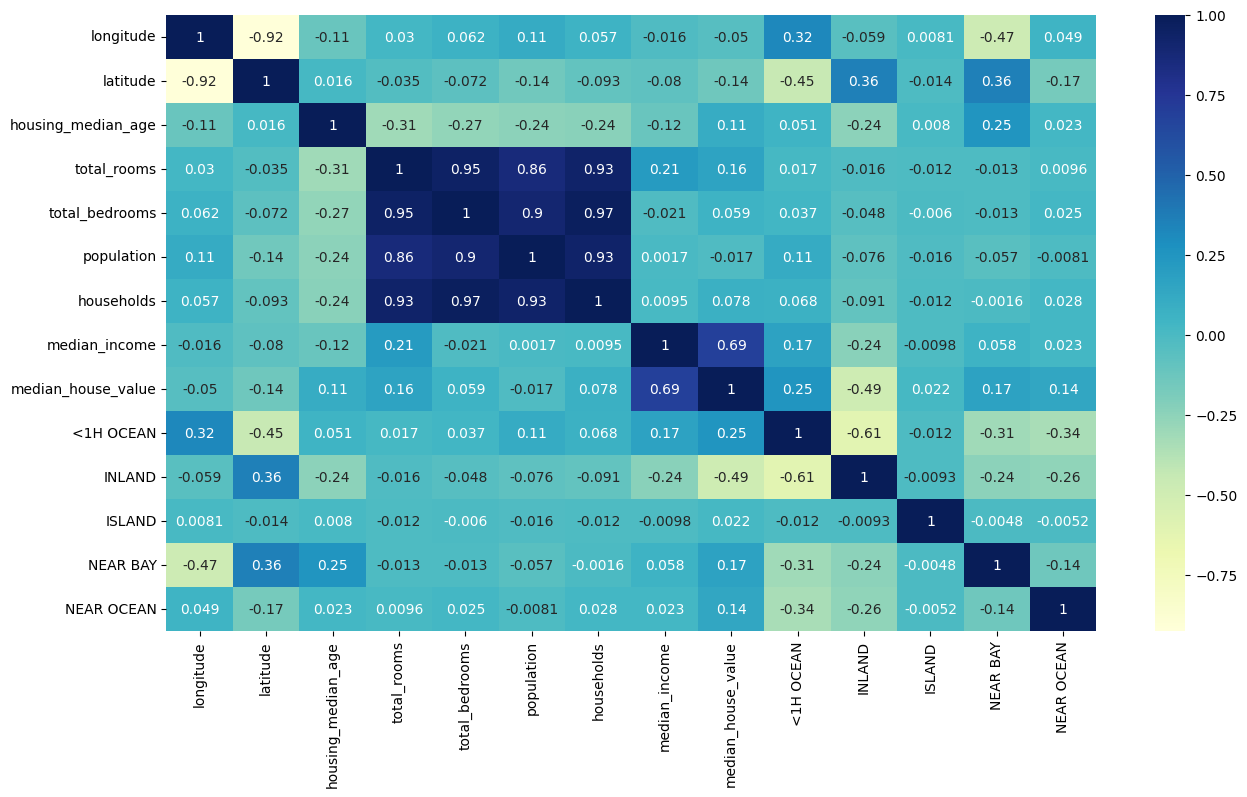

In [30]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='longitude', ylabel='latitude'>

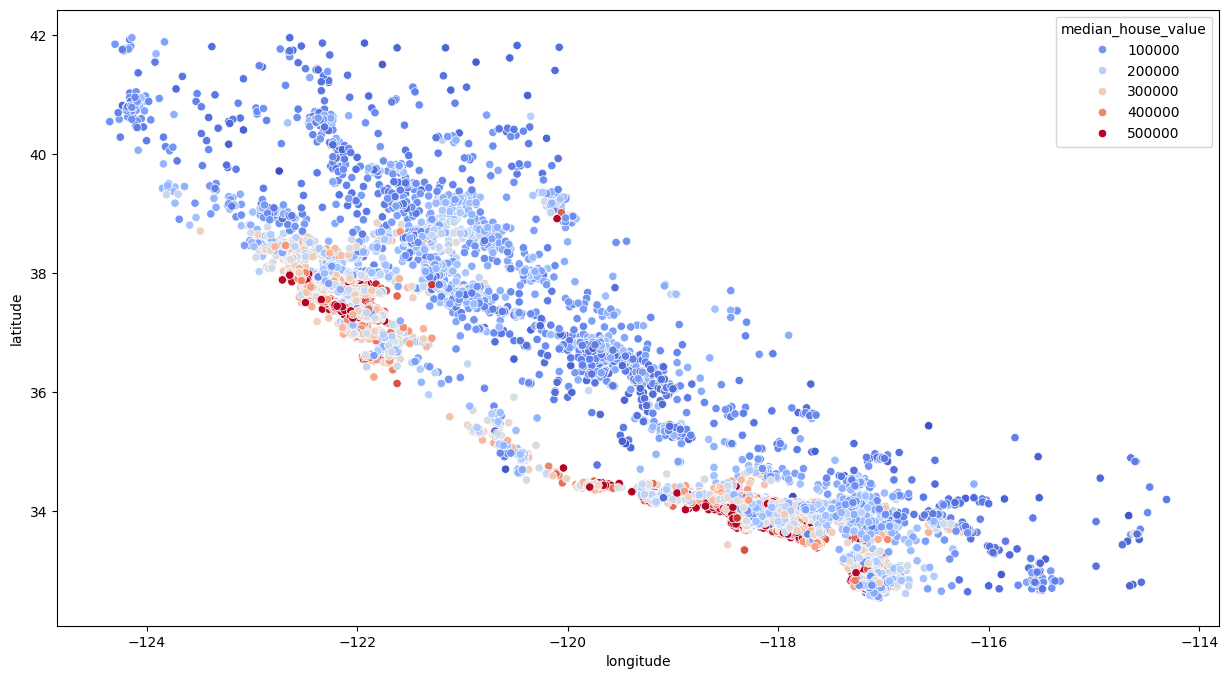

In [31]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='longitude', y='latitude', data=train_data, hue='median_house_value', palette='coolwarm')

### Some Feature Engineering

In [32]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['population_per_household'] = train_data['population'] / train_data['households']
train_data['rooms_per_household'] = train_data['total_rooms'] / train_data['households']

<Axes: >

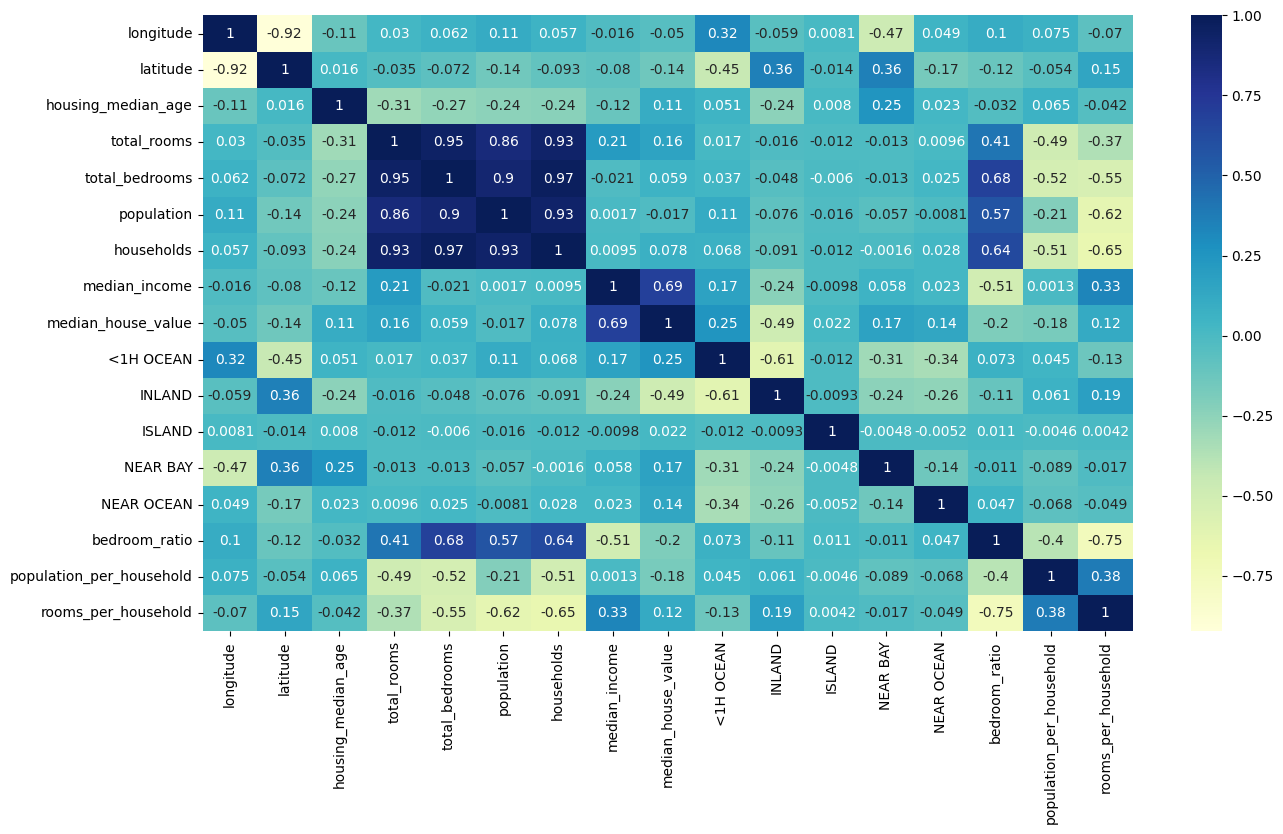

In [33]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

# Model Building

### linear regression

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop('median_house_value', axis=1), train_data['median_house_value']

scaled_X_train = scaler.fit_transform(X_train)

lin_reg = LinearRegression()
lin_reg.fit(scaled_X_train, y_train)

LinearRegression()

In [39]:
test_data = X_test.join(y_test)

test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)

test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity']).astype(int)).drop('ocean_proximity', axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['population_per_household'] = test_data['population'] / test_data['households']
test_data['rooms_per_household'] = test_data['total_rooms'] / test_data['households']
X_test, y_test = test_data.drop('median_house_value', axis=1), test_data['median_house_value']


In [44]:
scaled_X_test = scaler.transform(X_test)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [41]:
print(train_data.shape)
test_data.shape

(16346, 17)


(4087, 17)

In [45]:
lin_reg.score(scaled_X_test, y_test)

0.6696810753586753

### Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(scaled_X_train, y_train)

RandomForestRegressor()

In [47]:
forest.score(scaled_X_test, y_test)

0.8100548070438024

### hyperparameter tuning

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid ={
                'n_estimators': [100, 200 ,400, 500],
                'max_features':[2, 4, 6, 8]
            }

grid = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, return_train_score=True)

grid.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...................max_features=2, n_estimators=100; total time= 1.2min
[CV] END ...................max_features=2, n_estimators=100; total time= 1.6min
[CV] END ...................max_features=2, n_estimators=100; total time=  44.6s
[CV] END ...................max_features=2, n_estimators=100; total time=  45.4s
[CV] END ...................max_features=2, n_estimators=100; total time=  31.9s
[CV] END ...................max_features=2, n_estimators=200; total time=  45.9s
[CV] END ...................max_features=2, n_estimators=200; total time=  44.2s
[CV] END ...................max_features=2, n_estimators=200; total time=  37.4s
[CV] END ...................max_features=2, n_estimators=200; total time=  37.2s
[CV] END ...................max_features=2, n_estimators=200; total time=  37.8s
[CV] END ...................max_features=2, n_estimators=400; total time= 1.2min
[CV] END ...................max_features=2, n_es

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 400, 500]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [49]:
grid.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=500)

In [50]:
grid.best_estimator_.score(scaled_X_test, y_test)

0.8221834277574541

In [53]:
def predict_house_price(model, single_house_dect):
    single_house = pd.DataFrame(single_house_dect, index=[0])
    
    single_house['total_bedrooms'] = np.log(single_house['total_bedrooms'] + 1)
    single_house['total_rooms'] = np.log(single_house['total_rooms'] + 1)
    single_house['households'] = np.log(single_house['households'] + 1)
    single_house['population'] = np.log(single_house['population'] + 1)
    
    single_house['bedroom_ratio'] = single_house['total_bedrooms'] / single_house['total_rooms']
    single_house['population_per_household'] = single_house['population'] / single_house['households']
    single_house['rooms_per_household'] = single_house['total_rooms'] / single_house['households']
    
    single_house = scaler.transform(single_house)
    
    return model.predict(single_house)[0]

In [68]:
new_data_point = {
    'longitude': -122.22,
    'latitude': 37.86,
    'housing_median_age': 21.0,
    'total_rooms': 7099.0,
    'total_bedrooms': 1106.0,
    'population': 2401.0,
    'households':  1138.0,
    'median_income': 8.3014,
    '<1H OCEAN': 0,
    'INLAND': 0,
    'ISLAND': 0,
    'NEAR BAY': 1,
    'NEAR OCEAN': 0
}

In [67]:
data.iloc[1]

longitude              -122.22
latitude                 37.86
housing_median_age        21.0
total_rooms             7099.0
total_bedrooms          1106.0
population              2401.0
households              1138.0
median_income           8.3014
median_house_value    358500.0
ocean_proximity       NEAR BAY
Name: 1, dtype: object

In [71]:
prediction = predict_house_price(grid.best_estimator_, new_data_point)
print('Predicted price: ', prediction)

Predicted price:  388669.726
